In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import json
import numpy as np



In [2]:
xrd_list = []

with open('./traj_analysis/xrd_simulation.json', 'r') as fp:
    xrd_read = json.load(fp)
xrd_list = xrd_list + xrd_read

for time in [600,800,1000,1200,1400,1600,1800,2000]:
    with open('./traj_analysis/xrd_simulation_'+str(time)+'.json', 'r') as fp:
        xrd_read = json.load(fp)
    xrd_list = xrd_list + xrd_read

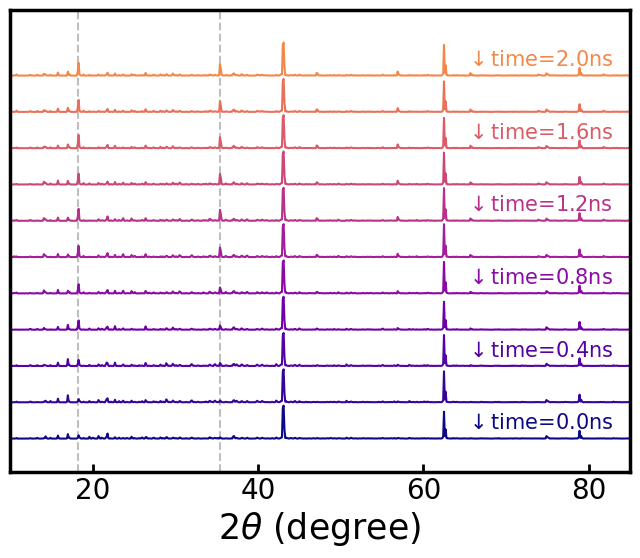

In [3]:
font = {# 'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
fig= plt.figure(figsize=(8,6),)
plt.tight_layout()

ax1 = fig.add_subplot(111)
ax1.spines['bottom'].set_linewidth(2.5)# inc. width of x-axis and color it green
ax1.spines['top'].set_linewidth(2.5)# inc. width of x-axis and color it green
ax1.spines['left'].set_linewidth(2.5)# inc. width of x-axis and color it green
ax1.spines['right'].set_linewidth(2.5)# inc. width of x-axis and color it green


colors = cm.plasma(np.linspace(0, 1, int(1.4*len(xrd_list))))
plt.vlines(x= 18.28, ymin=-1, ymax =13 , linestyles= '--', color = 'gray', alpha = 0.5)
plt.vlines(x=35.41, ymin=-1, ymax =13 , linestyles= '--', color = 'gray', alpha = 0.5)

for ii, xrd_dict in enumerate(xrd_list):
    time = xrd_dict['time']
    twotheta = xrd_dict['twotheta']
    intensity = xrd_dict['intensity']
    plt.plot(twotheta, intensity/np.max(intensity) + 1.1 *ii, color=colors[ii])
    
    if not(time % 400):
        plt.text(65, 1.1 *ii + 0.3, '$\downarrow$time={}ns'.format(np.round(time/1000, 2)), color=colors[ii], fontsize =15)

    
plt.tick_params(axis='x', direction='in',  which='both', width = 2, length = 6)
plt.xticks(fontsize = 20)
plt.xlabel(r"2$\theta$ (degree)", fontsize = 25)

plt.yticks([])

plt.xlim(10,85)
plt.ylim(-1,13)


plt.show()

# Plot the magmom distribution

In [4]:
with open('./traj_analysis/magmom_simulation.json', 'r') as fp:
    magmom_read = json.load(fp)
    
count_list = magmom_read['count_list']
mag_range = magmom_read['mag_range']

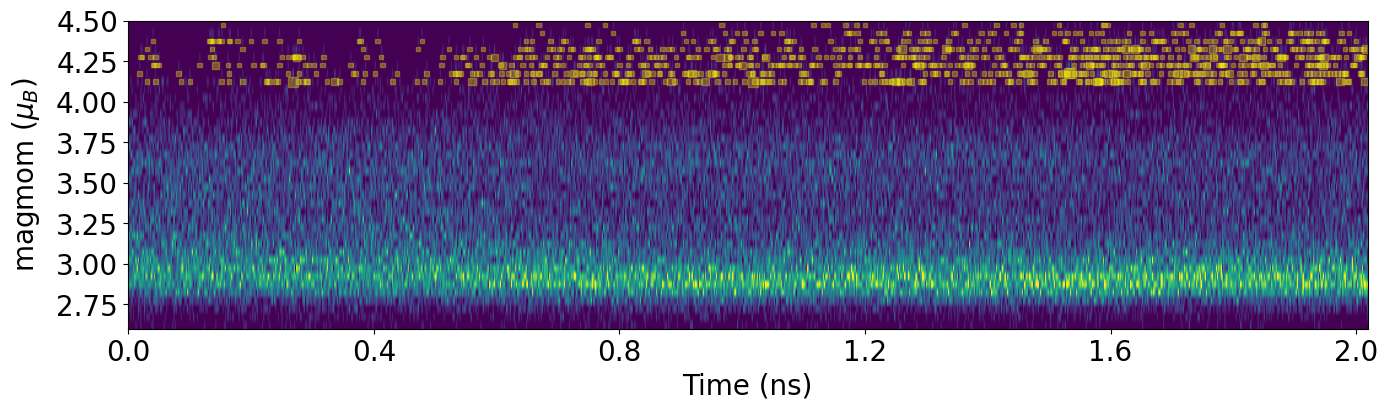

In [5]:
fig = plt.figure(figsize= (16,4))

start_idx = 1
end_idx = -1

x_shape, y_shape = np.array(count_list).shape

im_array = np.array(count_list).T[start_idx:end_idx,:]

plt.imshow(np.flipud(im_array), aspect='auto',
           vmin=0,
           vmax=10)

for ii in range(len(count_list)):
    count = np.array(count_list[ii])
    Mn2_indices = np.where(np.array(mag_range) >= 4.1)[0]
    y_scatter = np.array(mag_range)[Mn2_indices]
    s_scatter = count[Mn2_indices-1]
    plt.scatter(x = np.ones_like(y_scatter)* ii, y= 40 - Mn2_indices, 
                s = s_scatter**1.5 * 10, marker= 's', color = 'yellow', alpha = 0.31)

    
plt.xticks(np.arange(0,1020,100), np.arange(0,2.1,0.2), fontsize = 10)

plt.yticks(np.arange(y_shape)[start_idx-1:end_idx:5]-0.5, 
           ['4.50', '4.25', '4.00', '3.75', '3.50', '3.25', '3.00', '2.75'], fontsize = 20)


plt.xticks([0, 200, 400, 600, 800, 1000], [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], fontsize = 20)
plt.xlabel("Time (ns)", fontsize = 20)
plt.ylabel("magmom ($\mu_B$)", fontsize = 20, labelpad = 10)

# fig.savefig('./magmom_hist.pdf', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()


In [6]:
with open('./SRO_counts.json', 'r') as fp:
    sro_read = json.load(fp)

In [7]:
time_list = np.array(sro_read['time_list'])
SRO_list = np.array(sro_read['SRO_list'])

rand_limit= np.array([(1.1/2)**4, (1.1/2)**3*(0.8/2)**1*4, (1.1/2)**3*(0.1/2)**1*4, (1.1/2)**2*(0.8/2)**2*12, (1.1/2)**2*(0.1/2)**2*12, (1.1/2)**2*(0.8/2)*(0.1/2)*12  ])


In [8]:
count_0TM = SRO_list[:, 0] # (SRO_list[:, 0] - (1.1/2)**4 ) / (0.125 - (1.1/2)**4)
count_1Mn = SRO_list[:, 1]
count_1Ti = SRO_list[:, 2]

# (SRO_list[:, 0] - rand_limit[0] ) / rand_limit[0]
# count_1Mn = SRO_list[:, 1] # (SRO_list[:, 1] - rand_limit[1] ) / rand_limit[1]
# count_1Ti = SRO_list[:, 2]

In [9]:
count_1TM = count_1Mn + count_1Ti

In [10]:
count_0TM_new = np.zeros_like(count_0TM)


for ii in range(len(count_0TM)):
    count_0TM_new[ii] = np.average(count_0TM[ii-5:ii])
    
    
count_0TM_new[0] =count_0TM[0]
count_0TM_new[1] = np.average(count_0TM[0:2])
count_0TM_new[2] = np.average(count_0TM[0:3])
count_0TM_new[3] = np.average(count_0TM[0:4])
count_0TM_new[4] = np.average(count_0TM[0:5])

/opt/anaconda3/envs/chgnet/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/anaconda3/envs/chgnet/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
count_1TM_new = np.zeros_like(count_1TM)


for ii in range(len(count_1TM)):
    count_1TM_new[ii] = np.average(count_1TM[ii-5:ii])
    
    
count_1TM_new[0] =count_1TM[0]
count_1TM_new[1] = np.average(count_1TM[0:2])
count_1TM_new[2] = np.average(count_1TM[0:3])
count_1TM_new[3] = np.average(count_1TM[0:4])
count_1TM_new[4] = np.average(count_1TM[0:5])

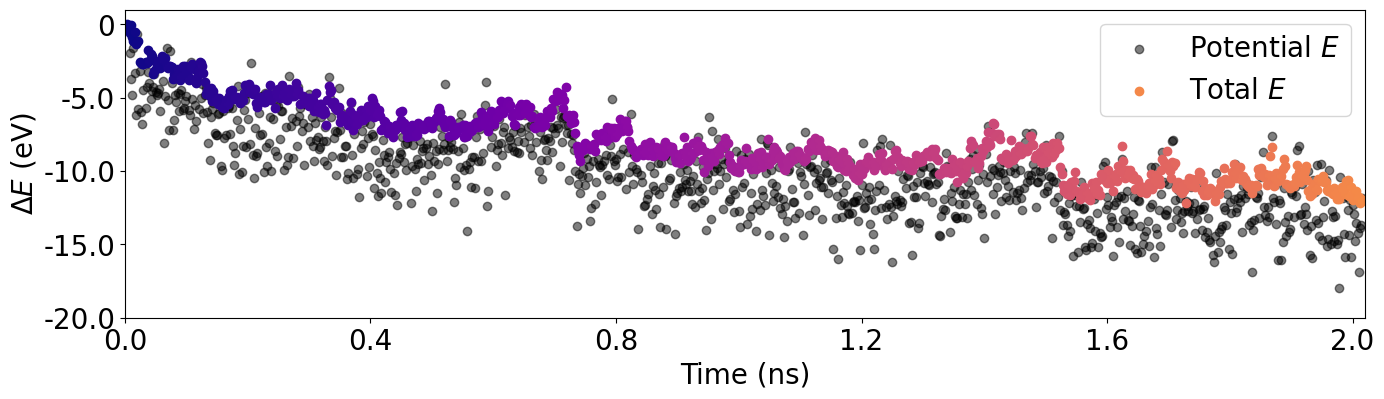

In [12]:



fig, ax1 = plt.subplots(figsize= (16,4))


traj_log = np.genfromtxt('./traj_T_1273.log')[1:1010, :]
colors = cm.plasma(np.linspace(0, 1, int(1.4*1000) ))

time_MD = traj_log[2:,0]
kE_MD = traj_log[2:,1] - traj_log[2,1]
potE_MD = traj_log[2:,2] - traj_log[2,2]

plt.scatter(time_MD[1:], potE_MD[1:], color = 'k', alpha = 0.5, label = 'Potential $E$')


for ii in range(len(time_MD)):
    
    if ii == 1000:
        plt.scatter(time_MD[ii], kE_MD[ii], color = colors[ii], label = 'Total $E$')
    else:
        plt.scatter(time_MD[ii], kE_MD[ii], color = colors[ii])


plt.yticks([0.00,-5, -10.00, -15,  -20.00], ['0', '-5.0', '-10.0', '-15.0', '-20.0'], fontsize = 20)

plt.xticks(np.array([0, 200, 400, 600, 800, 1000])*2, [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], fontsize = 20)

plt.xlabel("Time (ns)", fontsize = 20)
plt.ylabel("$\Delta E$ (eV)", fontsize = 20, labelpad= +3)
plt.legend(fontsize = 20, loc ='upper right')


plt.xlim([0,2020])
ax1.set_ylim([-20, 1])

# fig.savefig('./figure_saved/pot_energy.pdf', bbox_inches = 'tight', pad_inches = 0.1)


plt.show()



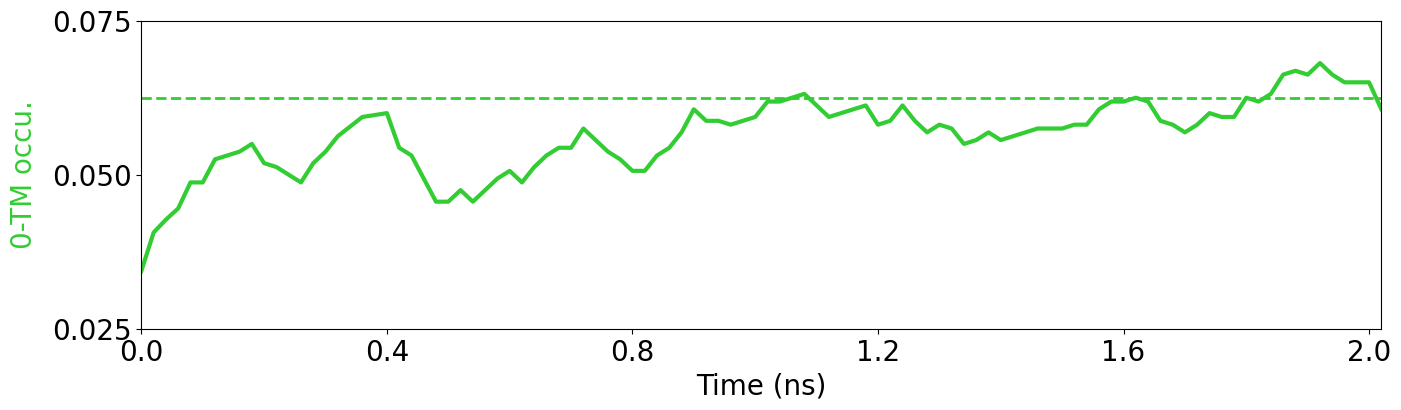

In [13]:
fig, ax1 = plt.subplots(figsize= (16,4))
plt.plot(time_list, count_0TM_new, color= 'limegreen', linewidth = 3, )
plt.plot(time_list, np.ones_like(count_0TM_new)* 0.0625, color= 'limegreen', linestyle = '--', linewidth = 2, )


plt.yticks(np.arange(0.025, 0.076, 0.025),fontsize = 20)

plt.xticks(np.array([0, 200, 400, 600, 800, 1000])*2, [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], fontsize = 20)

plt.xlabel("Time (ns)", fontsize = 20)
plt.ylabel("0-TM occu.", fontsize = 20, labelpad= 10, color ='limegreen')


plt.xlim([0,2020])
# fig.savefig('./figure_saved/just0TM.pdf', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()



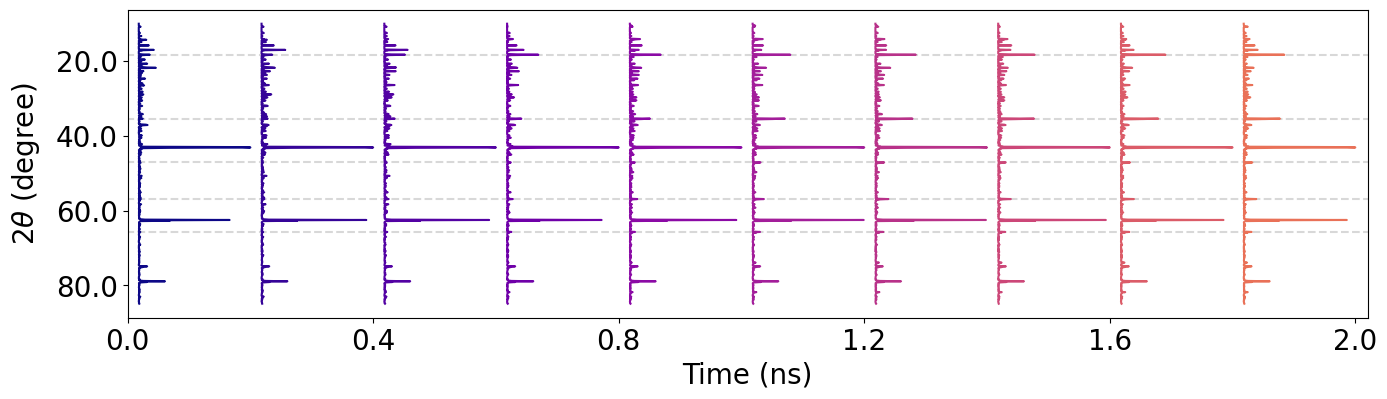

In [14]:
fig= plt.figure(figsize=(16,4),)
plt.tight_layout()

ax1 = fig.add_subplot(111)

colors = cm.plasma(np.linspace(0, 1, int(1.4*len(xrd_list))))
plt.hlines(y= 18.28, xmin=-1, xmax = 12 , linestyles= '--', color = 'gray', alpha = 0.3)
plt.hlines(y= 35.41, xmin=-1, xmax = 12 , linestyles= '--', color = 'gray', alpha = 0.3)
plt.hlines(y= 47.12, xmin=-1, xmax = 12 , linestyles= '--', color = 'gray', alpha = 0.3)
plt.hlines(y= 56.91, xmin=-1, xmax = 12 , linestyles= '--', color = 'gray', alpha = 0.3)
plt.hlines(y= 65.71, xmin=-1, xmax = 12 , linestyles= '--', color = 'gray', alpha = 0.3)


for ii, xrd_dict in enumerate(xrd_list[:-1]):
    time = xrd_dict['time']
    twotheta = xrd_dict['twotheta']
    intensity = xrd_dict['intensity']
    plt.plot(intensity/np.max(intensity) + 1.1 *ii + 0.1,  twotheta,  color=colors[ii])
    
plt.xticks(np.arange(0,11, 2)*1.1, np.round(np.arange(0,11, 2)*0.2, 2), fontsize = 20)
plt.xlabel("Time (ns)", fontsize = 20)

plt.yticks([20, 40, 60, 80], ['20.0', '40.0', '60.0', '80.0'], fontsize = 20)
plt.ylabel(r"2$\theta$ (degree)", fontsize = 20, labelpad= 10)



plt.xlim(0, 11*1010/1000)

ax1.invert_yaxis()
# fig.savefig('./figure_saved/XRD.pdf', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()


In [15]:
with open('./traj_analysis/cation_occupancy.json', 'r') as fp:
    occu_read = json.load(fp)

In [16]:
time_list = np.array(occu_read['time_list'])
occu_list = np.array(occu_read['count_list'])

In [17]:
tet_Li = occu_list[:, 0]
tet_Ti = occu_list[:, 1]
tet_Mn2 = occu_list[:, 2]
tet_Mn3 = occu_list[:, 3]
tet_Mn4 = occu_list[:, 4]

oct_Li = occu_list[:, 5]
oct_Ti = occu_list[:, 6]
oct_Mn2 = occu_list[:, 7]
oct_Mn3 = occu_list[:, 8]
oct_Mn4 = occu_list[:, 9]


In [18]:
import scipy.signal as signal

# Define the window size for averaging (e.g., 5 points)
window_size = 20
# Create a window of ones of the defined size
window = np.ones(window_size) / window_size

# Convolve the signal with the window

tet_Mn2_smooth = signal.convolve(tet_Mn2, window, mode='valid')
tet_Mn3_smooth = signal.convolve(tet_Mn3, window, mode='valid')
tet_Ti4_smooth = signal.convolve(tet_Ti, window, mode='valid')

oct_Mn3_smooth = signal.convolve(oct_Mn3, window, mode='valid')
oct_Mn2_smooth = signal.convolve(oct_Mn2, window, mode='valid')

In [19]:
N_time = len(tet_Mn2_smooth)

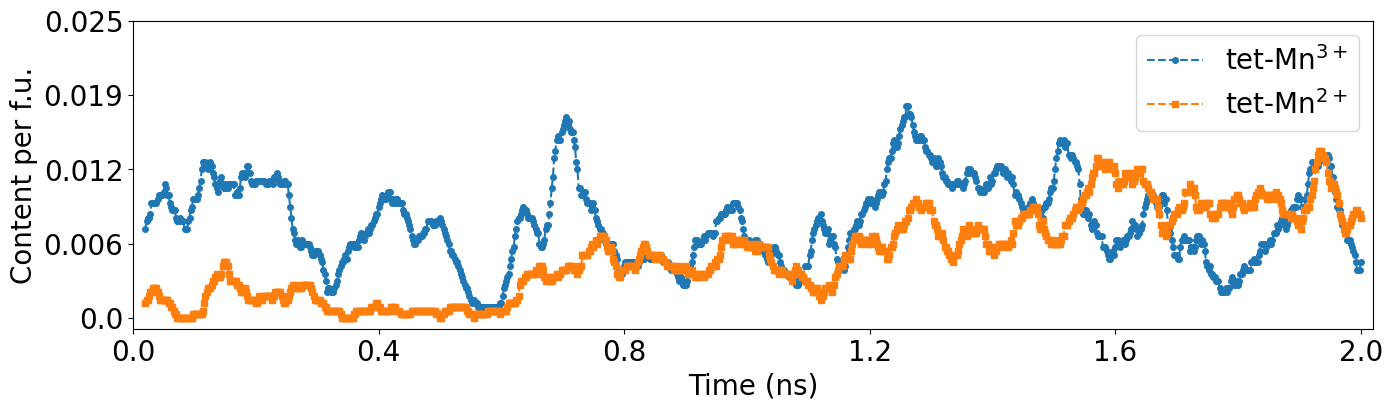

In [20]:
fig= plt.figure(figsize=(16,4),)
plt.tight_layout()

ax1 = fig.add_subplot(111)

plt.plot(time_list[window_size//2:-(window_size//2)+1], tet_Mn3_smooth, linestyle = '--', 
         marker = 'o', markersize = 4, alpha= 1.0 , label = r'tet-Mn$^{3+}$')
plt.plot(time_list[window_size//2:-(window_size//2)+1], tet_Mn2_smooth, linestyle = '--', 
         marker = 's', markersize = 4,  alpha= 1.0, label = r'tet-Mn$^{2+}$')



plt.xticks(np.array([0, 200, 400, 600, 800, 1000])*2, [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], fontsize = 20)

plt.xlabel("Time (ns)", fontsize = 20)

occu_y = np.array([0, 1, 2,3, 4])
plt.yticks(occu_y , np.round(occu_y / 160, 3),  fontsize = 20)
plt.ylabel("Content per f.u.", fontsize = 20)

plt.xlim([0,2020])
plt.legend(fontsize = 20, loc = 'upper right')

# fig.savefig('./figure_saved/Mn_valence_MRS.pdf', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()